In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math

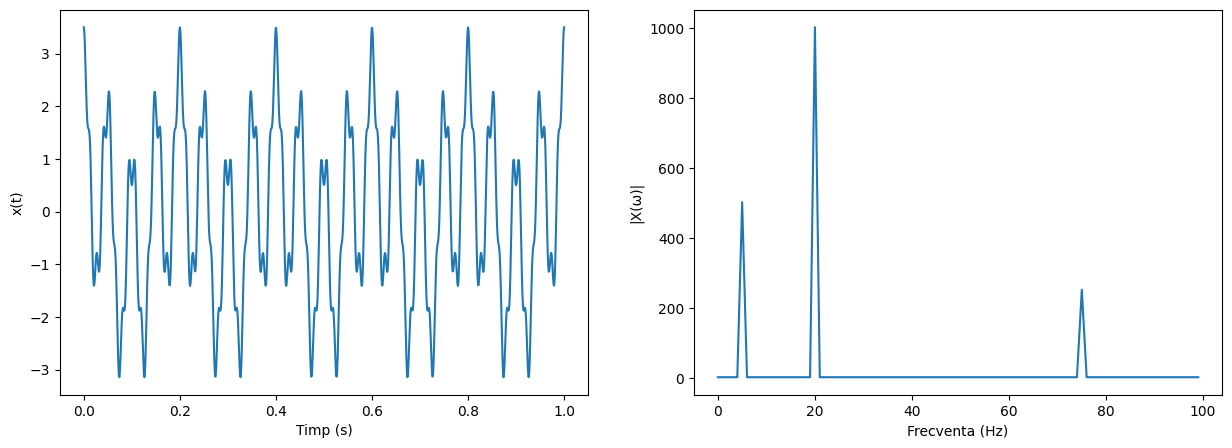

In [38]:
#ex3

def fourier(t, w=1):
    return math.e ** (-2 * np.pi * 1j * t * w) 

# t = np.arange(0, 1, 0.001)
t= np.linspace(0, 1, 1000)

f1 = 5
f2 = 20
f3 = 75

# Calculul transformatei Fourier
samples = np.cos(2 * np.pi * f1 * t) + 2 * np.cos(2 * np.pi * f2 * t) + 0.5 * np.cos(2 * np.pi * f3 * t)
W = 100
ls = np.zeros(W, dtype=np.complex_)

for l in range(W):
    ls[l] = np.sum(fourier(t, l) * samples)

# Afișarea modulului transformatei Fourier
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax1.set_xlabel("Timp (s)")
ax1.set_ylabel("x(t)")
ax1.plot(t, samples)
ax2.set_xlabel("Frecventa (Hz)")    
ax2.set_ylabel("|X(ω)|")
ax2.plot(np.abs(ls))

plt.savefig('ex3.png', format='png')
plt.savefig('ex3.pdf', format='pdf')
plt.show()